In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random
from sklearn.metrics import mean_squared_error
from statistics import median

In [20]:
img = cv2.imread('Elaine.bmp',0)

In [21]:
@jit(nopython=True)
def salt_and_pepper_noise(image, noise_density):
  R, C = image.shape
  salt_and_pepper_noise_added_image = np.zeros((R, C))

  for r in range (R):
    for c in range (C):
      rand = random.random()
      if rand < noise_density:
        salt_and_pepper_noise_added_image[r][c] = 0
      elif rand > 1 - noise_density:
        salt_and_pepper_noise_added_image[r][c] = 255
      else:
        salt_and_pepper_noise_added_image[r][c] = image[r][c]

  return salt_and_pepper_noise_added_image

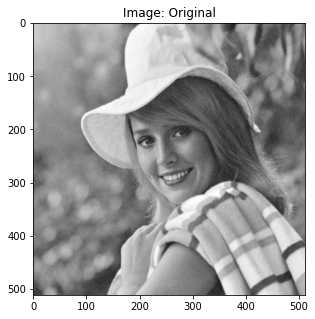

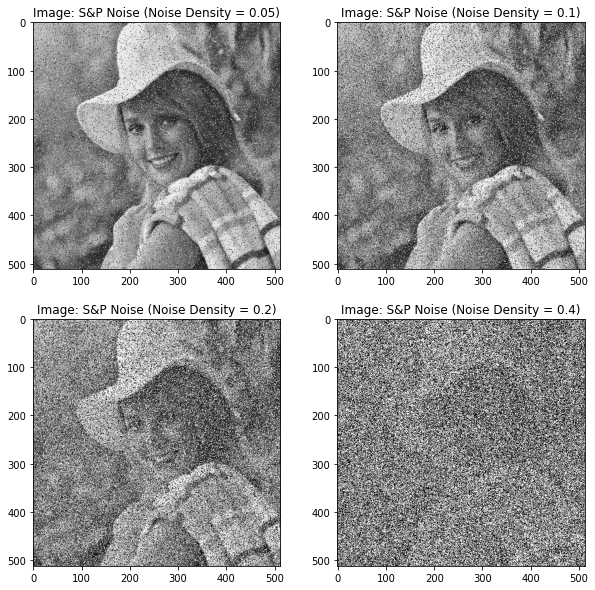

In [22]:
# 3.2.1 - Salt and Pepper Noise Added Images

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

noise_densities = [0.05, 0.1, 0.2, 0.4]

R, C = img.shape
salt_and_pepper_noise_added_images = np.zeros((len(noise_densities), R, C))

fig, plot = plt.subplots(int(len(noise_densities) / 2), 2, figsize = (10, 5 * int(len(noise_densities) / 2)))

for noise_density in range(0, len(noise_densities), 2):
  salt_and_pepper_noise_added_image_1 = salt_and_pepper_noise(img, noise_densities[noise_density])
  plot[int(noise_density / 2)][0].imshow(salt_and_pepper_noise_added_image_1, cmap='gray')
  plot[int(noise_density / 2)][0].set_title("Image: S&P Noise (Noise Density = " + str(noise_densities[noise_density]) + ")")

  salt_and_pepper_noise_added_image_2 = salt_and_pepper_noise(img, noise_densities[noise_density + 1])
  plot[int(noise_density / 2)][1].imshow(salt_and_pepper_noise_added_image_2, cmap='gray')
  plot[int(noise_density / 2)][1].set_title("Image: S&P Noise (Noise Density = " + str(noise_densities[noise_density + 1]) + ")")

  salt_and_pepper_noise_added_images[noise_density, 0:R, 0:C] = salt_and_pepper_noise_added_image_1
  salt_and_pepper_noise_added_images[noise_density + 1, 0:R, 0:C] = salt_and_pepper_noise_added_image_2

In [23]:
def median_filter(image, filter_size):
  R, C = image.shape

  median_filtered_image = np.zeros((R, C))

  for r in range (R):
    for c in range (C):
      median_filtered_image[r][c] = median(image[r:r + filter_size, c:c + filter_size].flatten())
  
  return median_filtered_image

In [6]:
# 3.2.1 - Median Filtered Images
fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

filter_sizes = [3, 5, 7, 9, 11]

mse_noisy_and_filtered = np.zeros(len(filter_sizes) * len(noise_densities))
mse_original_and_filtered = np.zeros(len(filter_sizes) * len(noise_densities))

fig, plot = plt.subplots(len(filter_sizes) * len(noise_densities), 2, figsize = (10, 5 * len(filter_sizes) * len(noise_densities)))

for filter_size in range(len(filter_sizes)):
  for noise_density in range(len(noise_densities)):
    salt_and_pepper_noise_added_image = salt_and_pepper_noise_added_images[noise_density, 0:R, 0:C]
    plot[filter_size * len(noise_densities) + noise_density][0].imshow(salt_and_pepper_noise_added_image, cmap='gray')
    plot[filter_size * len(noise_densities) + noise_density][0].set_title("Image: S&P Noise (Noise Density = " + str(noise_densities[noise_density]) + ")")

    median_filtered_image = median_filter(salt_and_pepper_noise_added_image, filter_sizes[filter_size])
    plot[filter_size * len(noise_densities) + noise_density][1].imshow(median_filtered_image, cmap='gray')
    plot[filter_size * len(noise_densities) + noise_density][1].set_title("Image: Median Filter (Filter Size = " + str(filter_sizes[filter_size]) + ")")

    mse_noisy_and_filtered[filter_size * len(noise_densities) + noise_density] = mean_squared_error(salt_and_pepper_noise_added_image, median_filtered_image)
    mse_original_and_filtered[filter_size * len(noise_densities) + noise_density] = mean_squared_error(img, median_filtered_image)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# 3.2.1 - MSE Report

for filter_size in range(len(filter_sizes)):
  print("Median Filter: Filter Size = " + str(filter_sizes[filter_size]))
  for noise_density in range(len(noise_densities)):
    print("----S&P Noise: Noise Density = " + str(noise_densities[noise_density]) + "----")
    print("MSE Between Noisy and Filtered Images = " + str(mse_noisy_and_filtered[filter_size * 4 + noise_density]))
    print("MSE Between Original and Filtered Images = " + str(mse_original_and_filtered[filter_size * 4 + noise_density]))
  print("\n")

Median Filter: Filter Size = 3
----S&P Noise: Noise Density = 0.05----
MSE Between Noisy and Filtered Images = 1916.5606021881104
MSE Between Original and Filtered Images = 104.17545127868652
----S&P Noise: Noise Density = 0.1----
MSE Between Noisy and Filtered Images = 3664.6183824539185
MSE Between Original and Filtered Images = 145.54156589508057
----S&P Noise: Noise Density = 0.2----
MSE Between Noisy and Filtered Images = 7242.852326393127
MSE Between Original and Filtered Images = 845.3797235488892
----S&P Noise: Noise Density = 0.4----
MSE Between Noisy and Filtered Images = 16430.27618789673
MSE Between Original and Filtered Images = 9887.767101287842


Median Filter: Filter Size = 5
----S&P Noise: Noise Density = 0.05----
MSE Between Noisy and Filtered Images = 2049.350136756897
MSE Between Original and Filtered Images = 230.50567722320557
----S&P Noise: Noise Density = 0.1----
MSE Between Noisy and Filtered Images = 3811.2201404571533
MSE Between Original and Filtered Images 

In [8]:
@jit(nopython=True)
def gaussian_noise(image, filter_variance):
  R, C = image.shape
  
  gaussian_noise_vector = np.random.normal(0, filter_variance, (R, C, 1))
  gaussian_noise_vector = gaussian_noise_vector.reshape(R, C)
  
  guassian_noise_added_image = image + gaussian_noise_vector

  return guassian_noise_added_image

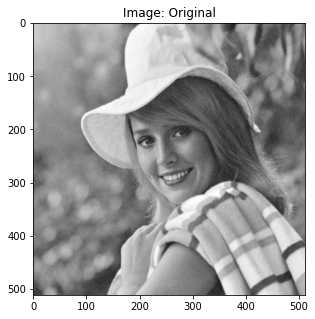

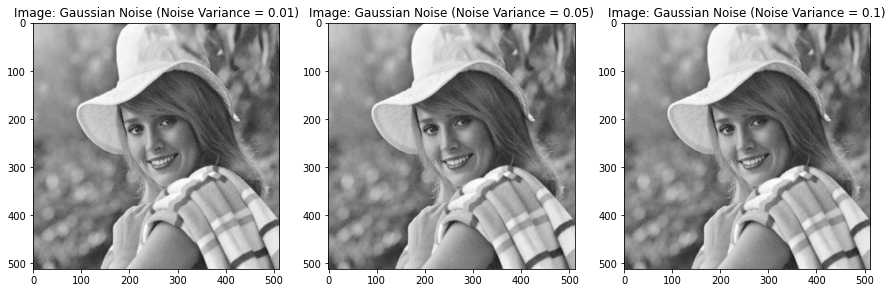

In [9]:
# 3.2.2 - Guassian Noise Added Images

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

noise_variances = [0.01, 0.05, 0.1]

R, C = img.shape
gaussian_noise_added_images = np.zeros((len(noise_variances), R, C))

fig, plot = plt.subplots(1, len(noise_variances), figsize = (5 * len(noise_variances), 5))

for noise_variance in range(len(noise_variances)):
  guassian_noise_added_image = gaussian_noise(img, noise_variances[noise_variance])
  plot[noise_variance].imshow(guassian_noise_added_image, cmap='gray')
  plot[noise_variance].set_title("Image: Gaussian Noise (Noise Variance = " + str(noise_variances[noise_variance]) + ")")

  gaussian_noise_added_images[noise_variance, 0:R, 0:C] = guassian_noise_added_image

In [10]:
def mean_filter(image, filter_size):
  R, C = image.shape

  average_filtered_image = np.zeros((R, C))

  for r in range (R):
    for c in range (C):
      average_filtered_image[r][c] = np.mean(image[r:r + filter_size, c:c + filter_size].flatten())
  
  return average_filtered_image

In [11]:
# 3.2.2 - Mean Filtered Images
fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

filter_sizes = [3, 5, 7, 9, 11]

mse_noisy_and_filtered_mean = np.zeros(len(filter_sizes) * len(noise_variances))
mse_original_and_filtered_mean = np.zeros(len(filter_sizes) * len(noise_variances))

fig, plot = plt.subplots(len(filter_sizes) * len(noise_variances), 2, figsize = (10, 5 * len(filter_sizes) * len(noise_variances)))

for filter_size in range(len(filter_sizes)):
  for noise_variance in range(len(noise_variances)):
    gaussian_noise_added_image = gaussian_noise_added_images[noise_variance, 0:R, 0:C]
    plot[filter_size * len(noise_variances) + noise_variance][0].imshow(gaussian_noise_added_image, cmap='gray')
    plot[filter_size * len(noise_variances) + noise_variance][0].set_title("Image: Gaussian Noise (Noise Variance = " + str(noise_variances[noise_variance]) + ")")

    mean_filtered_image = mean_filter(gaussian_noise_added_image, filter_sizes[filter_size])
    plot[filter_size * len(noise_variances) + noise_variance][1].imshow(mean_filtered_image, cmap='gray')
    plot[filter_size * len(noise_variances) + noise_variance][1].set_title("Image: Mean Filter (Filter Size = " + str(filter_sizes[filter_size]) + ")")

    mse_noisy_and_filtered_mean[filter_size * len(noise_variances) + noise_variance] = mean_squared_error(gaussian_noise_added_image, mean_filtered_image)
    mse_original_and_filtered_mean[filter_size * len(noise_variances) + noise_variance] = mean_squared_error(img, mean_filtered_image)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# 3.2.2 - Median Filtered Images
fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

filter_sizes = [3, 5, 7, 9, 11]

mse_noisy_and_filtered_median = np.zeros(len(filter_sizes) * len(noise_variances))
mse_original_and_filtered_median = np.zeros(len(filter_sizes) * len(noise_variances))

fig, plot = plt.subplots(len(filter_sizes) * len(noise_variances), 2, figsize = (10, 5 * len(filter_sizes) * len(noise_variances)))

for filter_size in range(len(filter_sizes)):
  for noise_variance in range(len(noise_variances)):
    gaussian_noise_added_image = gaussian_noise_added_images[noise_variance, 0:R, 0:C]
    plot[filter_size * len(noise_variances) + noise_variance][0].imshow(gaussian_noise_added_image, cmap='gray')
    plot[filter_size * len(noise_variances) + noise_variance][0].set_title("Image: Gaussian Noise (Noise Variance = " + str(noise_variances[noise_variance]) + ")")

    median_filtered_image = median_filter(gaussian_noise_added_image, filter_sizes[filter_size])
    plot[filter_size * len(noise_variances) + noise_variance][1].imshow(median_filtered_image, cmap='gray')
    plot[filter_size * len(noise_variances) + noise_variance][1].set_title("Image: Median Filter (Filter Size = " + str(filter_sizes[filter_size]) + ")")

    mse_noisy_and_filtered_median[filter_size * len(noise_variances) + noise_variance] = mean_squared_error(gaussian_noise_added_image, median_filtered_image)
    mse_original_and_filtered_median[filter_size * len(noise_variances) + noise_variance] = mean_squared_error(img, median_filtered_image)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# 3.2.2 - MSE Report

for filter_size in range(len(filter_sizes)):
  print("Mean and Median Filter: Filter Size = " + str(filter_sizes[filter_size]))
  for noise_variance in range(len(noise_variances)):
    print("----Gaussian Noise: Noise Density = " + str(noise_variances[noise_variance]) + "----")
    print("MSE Between Noisy and Filtered Images with Mean Filter = " + str(mse_noisy_and_filtered_mean[filter_size * len(noise_variances) + noise_variance]))
    print("MSE Between Noisy and Filtered Images with Median Filter = " + str(mse_noisy_and_filtered_median[filter_size * len(noise_variances) + noise_variance]))
    print("MSE Between Original and Filtered Images with Mean Filter = " + str(mse_original_and_filtered_mean[filter_size * len(noise_variances) + noise_variance]))
    print("MSE Between Original and Filtered Images with Median Filter = " + str(mse_original_and_filtered_median[filter_size * len(noise_variances) + noise_variance]))
  print("\n")

Mean and Median Filter: Filter Size = 3
----Gaussian Noise: Noise Density = 0.01----
MSE Between Noisy and Filtered Images with Mean Filter = 90.00556256687074
MSE Between Noisy and Filtered Images with Median Filter = 98.90275190197457
MSE Between Original and Filtered Images with Mean Filter = 90.00524514991355
MSE Between Original and Filtered Images with Median Filter = 98.9024634746639
----Gaussian Noise: Noise Density = 0.05----
MSE Between Noisy and Filtered Images with Mean Filter = 90.00672912883186
MSE Between Noisy and Filtered Images with Median Filter = 98.88818536104512
MSE Between Original and Filtered Images with Mean Filter = 90.00259170367107
MSE Between Original and Filtered Images with Median Filter = 98.88390931071024
----Gaussian Noise: Noise Density = 0.1----
MSE Between Noisy and Filtered Images with Mean Filter = 90.01515620268582
MSE Between Noisy and Filtered Images with Median Filter = 98.87109326875053
MSE Between Original and Filtered Images with Mean Filt

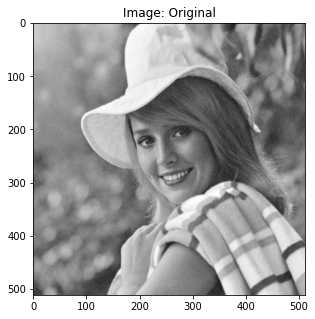

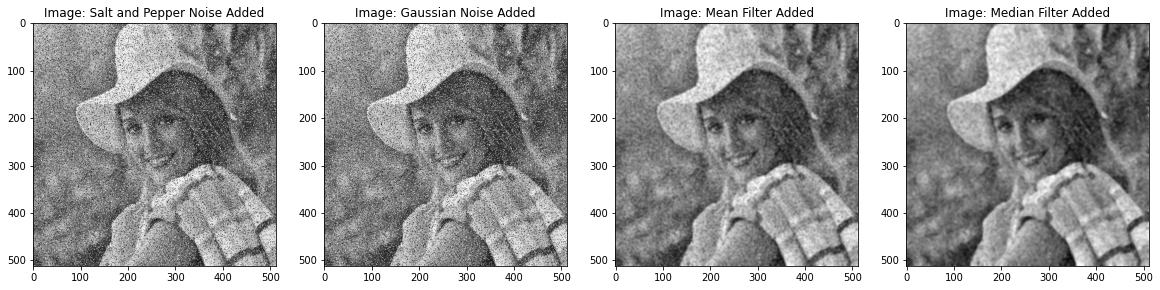

In [14]:
# 3.2.3 - Case 1: Salt and Pepper Noise(0.1) -> Gaussian Noise(0.1) -> Mean Filter(5) -> Median Filter(5)

salt_and_pepper_noise_density = 0.1
gaussian_noise_variance = 0.1
mean_filter_size = 5
median_filter_size = 5

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

salt_and_pepper_noise_added_image = salt_and_pepper_noise(img, salt_and_pepper_noise_density)
gaussian_noise_added_image = gaussian_noise(salt_and_pepper_noise_added_image, gaussian_noise_variance)
mean_filtered_image = mean_filter(gaussian_noise_added_image, mean_filter_size)
median_filtered_image = median_filter(mean_filtered_image, median_filter_size)

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(salt_and_pepper_noise_added_image, cmap='gray')
plot[0].set_title("Image: Salt and Pepper Noise Added")

plot[1].imshow(gaussian_noise_added_image, cmap='gray')
plot[1].set_title("Image: Gaussian Noise Added")

plot[2].imshow(mean_filtered_image, cmap='gray')
plot[2].set_title("Image: Mean Filter Added")

plot[3].imshow(median_filtered_image, cmap='gray')
plot[3].set_title("Image: Median Filter Added")

case_1_result = median_filtered_image
case_1_mse = mean_squared_error(case_1_result, img)

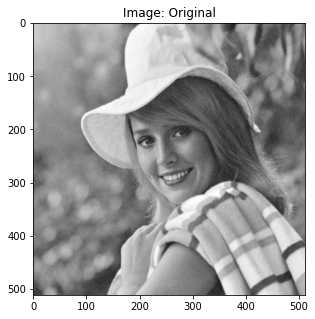

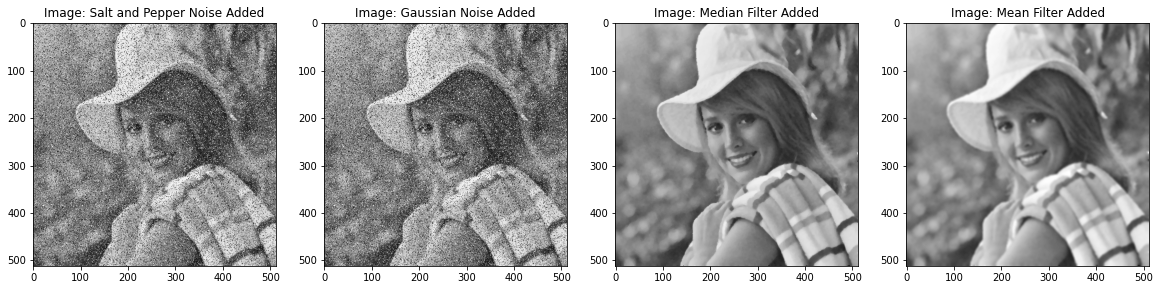

In [15]:
# 3.2.3 - Case 2: Salt and Pepper Noise(0.1) -> Gaussian Noise(0.1) -> Median Filter(5) -> Mean Filter(5)

salt_and_pepper_noise_density = 0.1
gaussian_noise_variance = 0.1
median_filter_size = 5
mean_filter_size = 5

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

salt_and_pepper_noise_added_image = salt_and_pepper_noise(img, salt_and_pepper_noise_density)
gaussian_noise_added_image = gaussian_noise(salt_and_pepper_noise_added_image, gaussian_noise_variance)
median_filtered_image = median_filter(gaussian_noise_added_image, median_filter_size)
mean_filtered_image = mean_filter(median_filtered_image, mean_filter_size)

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(salt_and_pepper_noise_added_image, cmap='gray')
plot[0].set_title("Image: Salt and Pepper Noise Added")

plot[1].imshow(gaussian_noise_added_image, cmap='gray')
plot[1].set_title("Image: Gaussian Noise Added")

plot[2].imshow(median_filtered_image, cmap='gray')
plot[2].set_title("Image: Median Filter Added")

plot[3].imshow(mean_filtered_image, cmap='gray')
plot[3].set_title("Image: Mean Filter Added")

case_2_result = mean_filtered_image
case_2_mse = mean_squared_error(case_2_result, img)

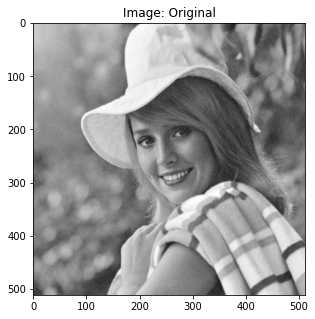

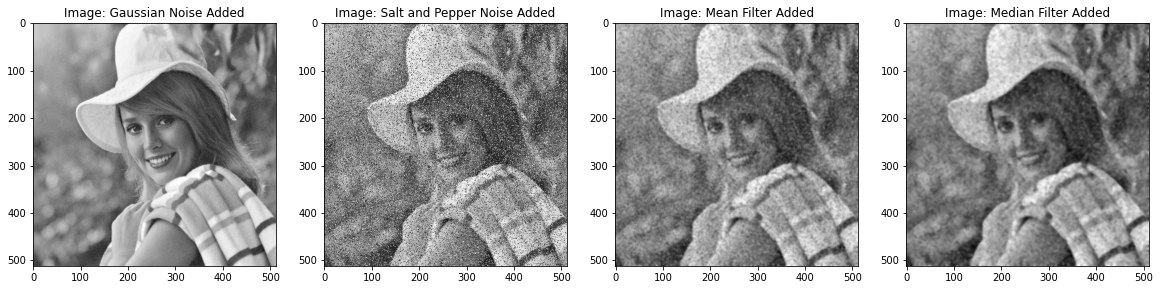

In [16]:
# 3.2.3 - Case 3: Gaussian Noise(0.1) -> Salt and Pepper Noise(0.1) -> Mean Filter(5) -> Median Filter(5)

gaussian_noise_variance = 0.1
salt_and_pepper_noise_density = 0.1
mean_filter_size = 5
median_filter_size = 5

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

gaussian_noise_added_image = gaussian_noise(img, gaussian_noise_variance)
salt_and_pepper_noise_added_image = salt_and_pepper_noise(gaussian_noise_added_image, salt_and_pepper_noise_density)
mean_filtered_image = mean_filter(salt_and_pepper_noise_added_image, mean_filter_size)
median_filtered_image = median_filter(mean_filtered_image, median_filter_size)

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(gaussian_noise_added_image, cmap='gray')
plot[0].set_title("Image: Gaussian Noise Added")

plot[1].imshow(salt_and_pepper_noise_added_image, cmap='gray')
plot[1].set_title("Image: Salt and Pepper Noise Added")

plot[2].imshow(mean_filtered_image, cmap='gray')
plot[2].set_title("Image: Mean Filter Added")

plot[3].imshow(median_filtered_image, cmap='gray')
plot[3].set_title("Image: Median Filter Added")

case_3_result = median_filtered_image
case_3_mse = mean_squared_error(case_3_result, img)

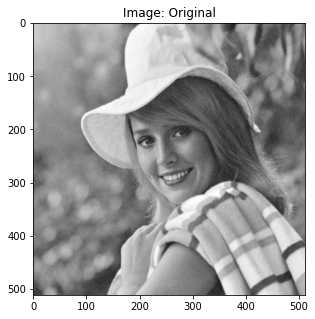

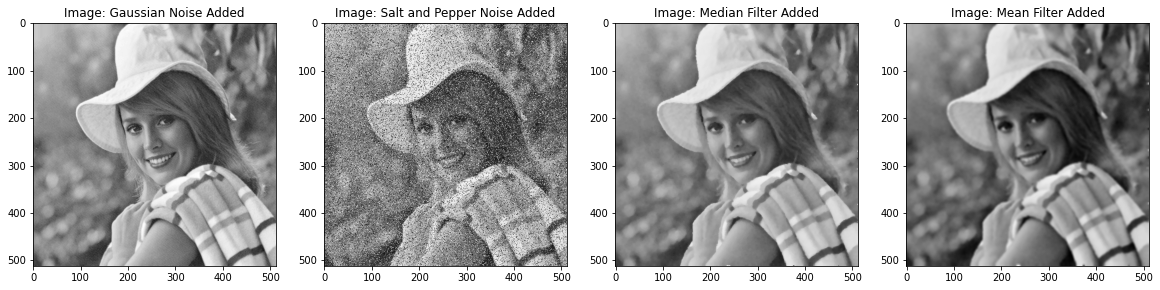

In [17]:
# 3.2.3 - Case 4: Gaussian Noise(0.1) -> Salt and Pepper Noise(0.1) -> Median Filter(5) -> Mean Filter(5)

gaussian_noise_variance = 0.1
salt_and_pepper_noise_density = 0.1
median_filter_size = 5
mean_filter_size = 5

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

gaussian_noise_added_image = gaussian_noise(img, gaussian_noise_variance)
salt_and_pepper_noise_added_image = salt_and_pepper_noise(gaussian_noise_added_image, salt_and_pepper_noise_density)
median_filtered_image = median_filter(salt_and_pepper_noise_added_image, median_filter_size)
mean_filtered_image = mean_filter(median_filtered_image, mean_filter_size)

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(gaussian_noise_added_image, cmap='gray')
plot[0].set_title("Image: Gaussian Noise Added")

plot[1].imshow(salt_and_pepper_noise_added_image, cmap='gray')
plot[1].set_title("Image: Salt and Pepper Noise Added")

plot[2].imshow(median_filtered_image, cmap='gray')
plot[2].set_title("Image: Median Filter Added")

plot[3].imshow(mean_filtered_image, cmap='gray')
plot[3].set_title("Image: Mean Filter Added")

case_4_result = mean_filtered_image
case_4_mse = mean_squared_error(case_4_result, img)

MSE Report
Case 1: Salt and Pepper Noise(0.1) -> Gaussian Noise(0.1) -> Mean Filter(5) -> Median Filter(5) MSE = 589.9504425609473
Case 2: Salt and Pepper Noise(0.1) -> Gaussian Noise(0.1) -> Median Filter(5) -> Mean Filter(5) MSE = 512.6706167255204
Case 3: Gaussian Noise(0.1) -> Salt and Pepper Noise(0.1) -> Mean Filter(5) -> Median Filter(5) -> Median Filter(5) MSE = 586.4087135701509
Case 4: Gaussian Noise(0.1) -> Salt and Pepper Noise(0.1) -> Median Filter(5) -> Mean Filter(5) -> Median Filter(5) MSE = 513.5038190121368


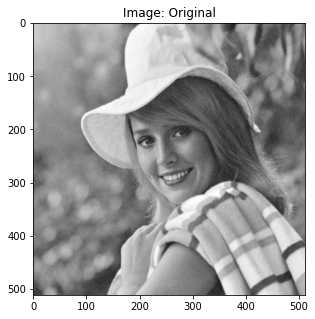

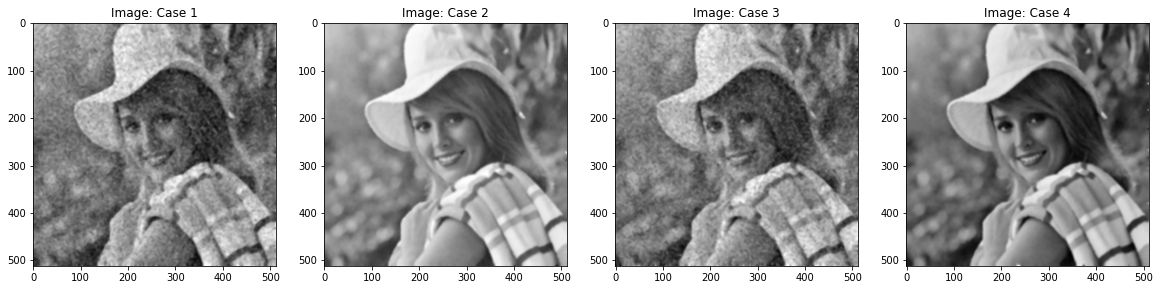

In [18]:
# 3.2.3 - All Cases Together

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(case_1_result, cmap='gray')
plot[0].set_title("Image: Case 1")

plot[1].imshow(case_2_result, cmap='gray')
plot[1].set_title("Image: Case 2")

plot[2].imshow(case_3_result, cmap='gray')
plot[2].set_title("Image: Case 3")

plot[3].imshow(case_4_result, cmap='gray')
plot[3].set_title("Image: Case 4")

print("MSE Report")
print("Case 1: Salt and Pepper Noise(0.1) -> Gaussian Noise(0.1) -> Mean Filter(5) -> Median Filter(5) MSE = " + str(case_1_mse))
print("Case 2: Salt and Pepper Noise(0.1) -> Gaussian Noise(0.1) -> Median Filter(5) -> Mean Filter(5) MSE = " + str(case_2_mse))
print("Case 3: Gaussian Noise(0.1) -> Salt and Pepper Noise(0.1) -> Mean Filter(5) -> Median Filter(5) -> Median Filter(5) MSE = " + str(case_3_mse))
print("Case 4: Gaussian Noise(0.1) -> Salt and Pepper Noise(0.1) -> Median Filter(5) -> Mean Filter(5) -> Median Filter(5) MSE = " + str(case_4_mse))